In [1]:
!uv pip install -q matplotlib
!uv pip install -q bs4

In [2]:
html_content = """
<table>
  <thead>\n
 <tr style=\text-align: left;\>\n
      <th>Step</th>\n
      <th>Training Loss</th>\n
      <th>Validation Loss</th>\n
      <th>Mse-en-ua Negative Mse</th>\n
      <th>Sts17-en-en Pearson Cosine</th>\n
      <th>Sts17-en-en Spearman Cosine</th>\n
      <th>Sts17-en-ua Pearson Cosine</th>\n
      <th>Sts17-en-ua Spearman Cosine</th>\n
      <th>Sts17-ua-ua Pearson Cosine</th>\n
      <th>Sts17-ua-ua Spearman Cosine</th>\n
      <th>Sequential Score</th>\n
    </tr>\n
  </thead>\n
  <tbody>\n
    <tr>\n
      <td>1024</td>\n
      <td>0.328100</td>\n
      <td>0.029718</td>\n
      <td>-2.959170</td>\n
      <td>0.181141</td>\n
      <td>0.232496</td>\n
      <td>0.128094</td>\n
      <td>0.154688</td>\n
      <td>0.150451</td>\n
      <td>0.226489</td>\n
      <td>0.226489</td>\n
    </tr>\n
    <tr>\n
      <td>2048</td>\n
      <td>0.113600</td>\n
      <td>0.204209</td>\n
      <td>-21.669276</td>\n
      <td>0.006631</td>\n
      <td>0.055340</td>\n
      <td>0.070726</td>\n
      <td>0.042919</td>\n
      <td>0.199824</td>\n
      <td>0.244206</td>\n
      <td>0.244206</td>\n
    </tr>\n
    <tr>\n
      <td>3072</td>\n
      <td>0.100800</td>\n
      <td>0.027258</td>\n
      <td>-2.746147</td>\n
      <td>0.200949</td>\n
      <td>0.266629</td>\n
      <td>0.093361</td>\n
      <td>0.075772</td>\n
      <td>0.209707</td>\n
      <td>0.261321</td>\n
      <td>0.261321</td>\n
    </tr>\n
    <tr>\n
      <td>4096</td>\n
      <td>0.084300</td>\n
      <td>0.024348</td>\n
      <td>-2.462274</td>\n
      <td>0.143295</td>\n
      <td>0.254136</td>\n
      <td>0.009012</td>\n
      <td>0.001158</td>\n
      <td>0.334547</td>\n
      <td>0.367957</td>\n
      <td>0.367957</td>\n
    </tr>\n
    <tr>\n
      <td>5120</td>\n
      <td>0.075600</td>\n
      <td>0.021600</td>\n
      <td>-2.209467</td>\n
      <td>0.354435</td>\n
      <td>0.393262</td>\n
      <td>0.221301</td>\n
      <td>0.253500</td>\n
      <td>0.364041</td>\n
      <td>0.434220</td>\n
      <td>0.434220</td>\n
    </tr>\n
    <tr>\n
      <td>6144</td>\n
      <td>0.066100</td>\n
      <td>0.018674</td>\n
      <td>-1.953918</td>\n
      <td>0.515341</td>\n
      <td>0.573923</td>\n
      <td>0.427968</td>\n
      <td>0.422165</td>\n
      <td>0.490268</td>\n
      <td>0.505644</td>\n
      <td>0.505644</td>\n
    </tr>\n
    <tr>\n
      <td>7168</td>\n
      <td>0.057900</td>\n
      <td>0.016444</td>\n
      <td>-1.751325</td>\n
      <td>0.565875</td>\n
      <td>0.618363</td>\n
      <td>0.484408</td>\n
      <td>0.489667</td>\n
      <td>0.547859</td>\n
      <td>0.582624</td>\n
      <td>0.582624</td>\n
    </tr>\n
    <tr>\n
      <td>8192</td>\n
      <td>0.052600</td>\n
      <td>0.015283</td>\n
      <td>-1.654613</td>\n
      <td>0.563253</td>\n
      <td>0.621936</td>\n
      <td>0.459593</td>\n
      <td>0.456844</td>\n
      <td>0.550040</td>\n
      <td>0.584229</td>\n
      <td>0.584229</td>\n
    </tr>\n
    <tr>\n
      <td>9216</td>\n
      <td>0.048800</td>\n
      <td>0.014158</td>\n
      <td>-1.552453</td>\n
      <td>0.568453</td>\n
      <td>0.615990</td>\n
      <td>0.478887</td>\n
      <td>0.501189</td>\n
      <td>0.543509</td>\n
      <td>0.588382</td>\n
      <td>0.588382</td>\n
    </tr>\n
    <tr>\n
      <td>10240</td>\n
      <td>0.046000</td>\n
      <td>0.013501</td>\n
      <td>-1.495738</td>\n
      <td>0.584101</td>\n
      <td>0.636096</td>\n
      <td>0.488604</td>\n
      <td>0.504579</td>\n
      <td>0.553593</td>\n
      <td>0.596919</td>\n
      <td>0.596919</td>\n
    </tr>\n
    <tr>\n
      <td>11264</td>\n
      <td>0.043700</td>\n
      <td>0.013000</td>\n
      <td>-1.450640</td>\n
      <td>0.588446</td>\n
      <td>0.645279</td>\n
      <td>0.494060</td>\n
      <td>0.509326</td>\n
      <td>0.559759</td>\n
      <td>0.593868</td>\n
      <td>0.593868</td>\n
    </tr>\n
    <tr>\n
      <td>12288</td>\n
      <td>0.041900</td>\n
      <td>0.012476</td>\n
      <td>-1.404924</td>\n
      <td>0.594434</td>\n
      <td>0.640295</td>\n
      <td>0.496425</td>\n
      <td>0.505422</td>\n
      <td>0.571513</td>\n
      <td>0.601954</td>\n
      <td>0.601954</td>\n
    </tr>\n
    <tr>\n
      <td>13312</td>\n
      <td>0.040400</td>\n
      <td>0.012178</td>\n
      <td>-1.379371</td>\n
      <td>0.614736</td>\n
      <td>0.665432</td>\n
      <td>0.521558</td>\n
      <td>0.544231</td>\n
      <td>0.582230</td>\n
      <td>0.618241</td>\n
      <td>0.618241</td>\n
    </tr>\n
    <tr>\n
      <td>14336</td>\n
      <td>0.039400</td>\n
      <td>0.011797</td>\n
      <td>-1.343375</td>\n
      <td>0.627164</td>\n
      <td>0.680047</td>\n
      <td>0.550251</td>\n
      <td>0.578991</td>\n
      <td>0.594108</td>\n
      <td>0.629149</td>\n
      <td>0.629149</td>\n
    </tr>\n
    <tr>\n
      <td>15360</td>\n
      <td>0.038300</td>\n
      <td>0.011517</td>\n
      <td>-1.318428</td>\n
      <td>0.632766</td>\n
      <td>0.683649</td>\n
      <td>0.555853</td>\n
      <td>0.580481</td>\n
      <td>0.597564</td>\n
      <td>0.630112</td>\n
      <td>0.630112</td>\n
    </tr>\n
    <tr>\n
      <td>16384</td>\n
      <td>0.037500</td>\n
      <td>0.011364</td>\n
      <td>-1.306724</td>\n
      <td>0.621755</td>\n
      <td>0.674201</td>\n
      <td>0.530871</td>\n
      <td>0.555492</td>\n
      <td>0.578160</td>\n
      <td>0.605482</td>\n
      <td>0.605482</td>\n
    </tr>\n
    <tr>\n
      <td>17408</td>\n
      <td>0.036800</td>\n
      <td>0.011126</td>\n
      <td>-1.286428</td>\n
      <td>0.642297</td>\n
      <td>0.690917</td>\n
      <td>0.552568</td>\n
      <td>0.576452</td>\n
      <td>0.596039</td>\n
      <td>0.625632</td>\n
      <td>0.625632</td>\n
    </tr>\n
    <tr>\n
      <td>18432</td>\n
      <td>0.036000</td>\n
      <td>0.010898</td>\n
      <td>-1.263252</td>\n
      <td>0.636473</td>\n
      <td>0.687500</td>\n
      <td>0.556233</td>\n
      <td>0.580114</td>\n
      <td>0.587732</td>\n
      <td>0.617785</td>\n
      <td>0.617785</td>\n
    </tr>\n
    <tr>\n
      <td>19456</td>\n
      <td>0.035300</td>\n
      <td>0.010738</td>\n
      <td>-1.248995</td>\n
      <td>0.651560</td>\n
      <td>0.705952</td>\n
      <td>0.571071</td>\n
      <td>0.595890</td>\n
      <td>0.605924</td>\n
      <td>0.632161</td>\n
      <td>0.632161</td>\n
    </tr>\n
    <tr>\n
      <td>20480</td>\n
      <td>0.035000</td>\n
      <td>0.010604</td>\n
      <td>-1.235731</td>\n
      <td>0.655170</td>\n
      <td>0.712738</td>\n
      <td>0.579373</td>\n
      <td>0.604725</td>\n
      <td>0.609736</td>\n
      <td>0.638918</td>\n
      <td>0.638918</td>\n
    </tr>\n
    <tr>\n
      <td>21504</td>\n
      <td>0.034400</td>\n
      <td>0.010488</td>\n
      <td>-1.226516</td>\n
      <td>0.679022</td>\n
      <td>0.726452</td>\n
      <td>0.602753</td>\n
      <td>0.623309</td>\n
      <td>0.620033</td>\n
      <td>0.645925</td>\n
      <td>0.645925</td>\n
    </tr>\n
    <tr>\n
      <td>22528</td>\n
      <td>0.033500</td>\n
      <td>0.010312</td>\n
      <td>-1.210830</td>\n
      <td>0.661901</td>\n
      <td>0.718394</td>\n
      <td>0.586867</td>\n
      <td>0.615064</td>\n
      <td>0.611520</td>\n
      <td>0.643832</td>\n
      <td>0.643832</td>\n
    </tr>\n
    <tr>\n
      <td>23552</td>\n
      <td>0.032700</td>\n
      <td>0.010290</td>\n
      <td>-1.210138</td>\n
      <td>0.664029</td>\n
      <td>0.712189</td>\n
      <td>0.583614</td>\n
      <td>0.607413</td>\n
      <td>0.610449</td>\n
      <td>0.642742</td>\n
      <td>0.642742</td>\n
    </tr>\n
    <tr>\n
      <td>24576</td>\n
      <td>0.032400</td>\n
      <td>0.010152</td>\n
      <td>-1.197187</td>\n
      <td>0.675180</td>\n
      <td>0.723155</td>\n
      <td>0.596605</td>\n
      <td>0.617359</td>\n
      <td>0.617872</td>\n
      <td>0.644732</td>\n
      <td>0.644732</td>\n
    </tr>\n
    <tr>\n
      <td>25600</td>\n
      <td>0.032200</td>\n
      <td>0.009998</td>\n
      <td>-1.181282</td>\n
      <td>0.672553</td>\n
      <td>0.721732</td>\n
      <td>0.590351</td>\n
      <td>0.616598</td>\n
      <td>0.612949</td>\n
      <td>0.645682</td>\n
      <td>0.645682</td>\n
    </tr>\n
    <tr>\n
      <td>26624</td>\n
      <td>0.032000</td>\n
      <td>0.009916</td>\n
      <td>-1.174489</td>\n
      <td>0.676968</td>\n
      <td>0.730774</td>\n
      <td>0.597129</td>\n
      <td>0.627248</td>\n
      <td>0.618294</td>\n
      <td>0.653360</td>\n
      <td>0.653360</td>\n
    </tr>\n
    <tr>\n
      <td>27648</td>\n
      <td>0.031600</td>\n
      <td>0.009836</td>\n
      <td>-1.167254</td>\n
      <td>0.670573</td>\n
      <td>0.728921</td>\n
      <td>0.583451</td>\n
      <td>0.612452</td>\n
      <td>0.606446</td>\n
      <td>0.644056</td>\n
      <td>0.644056</td>\n
    </tr>\n
    <tr>\n
      <td>28672</td>\n
      <td>0.031400</td>\n
      <td>0.009775</td>\n
      <td>-1.162211</td>\n
      <td>0.665942</td>\n
      <td>0.722187</td>\n
      <td>0.584668</td>\n
      <td>0.610458</td>\n
      <td>0.606166</td>\n
      <td>0.636544</td>\n
      <td>0.636544</td>\n
    </tr>\n
    <tr>\n
      <td>29696</td>\n
      <td>0.031200</td>\n
      <td>0.009739</td>\n
      <td>-1.159342</td>\n
      <td>0.664575</td>\n
      <td>0.717537</td>\n
      <td>0.585272</td>\n
      <td>0.612070</td>\n
      <td>0.606613</td>\n
      <td>0.634838</td>\n
      <td>0.634838</td>\n
    </tr>\n
    <tr>\n
      <td>30720</td>\n
      <td>0.030800</td>\n
      <td>0.009608</td>\n
      <td>-1.145655</td>\n
      <td>0.665661</td>\n
      <td>0.720449</td>\n
      <td>0.578297</td>\n
      <td>0.604404</td>\n
      <td>0.605089</td>\n
      <td>0.637652</td>\n
      <td>0.637652</td>\n
    </tr>\n
    <tr>\n
      <td>31744</td>\n
      <td>0.030700</td>\n
      <td>0.009548</td>\n
      <td>-1.141053</td>\n
      <td>0.669421</td>\n
      <td>0.723013</td>\n
      <td>0.585592</td>\n
      <td>0.617496</td>\n
      <td>0.604918</td>\n
      <td>0.635281</td>\n
      <td>0.635281</td>\n
    </tr>\n
    <tr>\n
      <td>32768</td>\n
      <td>0.030500</td>\n
      <td>0.009535</td>\n
      <td>-1.141413</td>\n
      <td>0.654881</td>\n
      <td>0.712986</td>\n
      <td>0.571480</td>\n
      <td>0.605234</td>\n
      <td>0.596568</td>\n
      <td>0.634026</td>\n
      <td>0.634026</td>\n
    </tr>\n
    <tr>\n
      <td>33792</td>\n
      <td>0.029600</td>\n
      <td>0.009473</td>\n
      <td>-1.136022</td>\n
      <td>0.672167</td>\n
      <td>0.723410</td>\n
      <td>0.586434</td>\n
      <td>0.616005</td>\n
      <td>0.610256</td>\n
      <td>0.641067</td>\n
      <td>0.641067</td>\n
    </tr>\n
    <tr>\n
      <td>34816</td>\n
      <td>0.029500</td>\n
      <td>0.009431</td>\n
      <td>-1.131734</td>\n
      <td>0.672672</td>\n
      <td>0.722027</td>\n
      <td>0.584464</td>\n
      <td>0.613096</td>\n
      <td>0.606951</td>\n
      <td>0.639608</td>\n
      <td>0.639608</td>\n
    </tr>\n
    <tr>\n
      <td>35840</td>\n
      <td>0.029400</td>\n
      <td>0.009404</td>\n
      <td>-1.130603</td>\n
      <td>0.677077</td>\n
      <td>0.731461</td>\n
      <td>0.592916</td>\n
      <td>0.616692</td>\n
      <td>0.619213</td>\n
      <td>0.650484</td>\n
      <td>0.650484</td>\n
    </tr>\n
    <tr>\n
      <td>36864</td>\n
      <td>0.029300</td>\n
      <td>0.009361</td>\n
      <td>-1.126310</td>\n
      <td>0.671380</td>\n
      <td>0.721943</td>\n
      <td>0.586051</td>\n
      <td>0.608866</td>\n
      <td>0.615178</td>\n
      <td>0.645034</td>\n
      <td>0.645034</td>\n
    </tr>\n
    <tr>\n
      <td>37888</td>\n
      <td>0.029200</td>\n
      <td>0.009323</td>\n
      <td>-1.122514</td>\n
      <td>0.672949</td>\n
      <td>0.723558</td>\n
      <td>0.589907</td>\n
      <td>0.614101</td>\n
      <td>0.613716</td>\n
      <td>0.645091</td>\n
      <td>0.645091</td>\n
    </tr>\n
    <tr>\n
      <td>38912</td>\n
      <td>0.029100</td>\n
      <td>0.009291</td>\n
      <td>-1.120370</td>\n
      <td>0.681165</td>\n
      <td>0.733143</td>\n
      <td>0.594752</td>\n
      <td>0.617912</td>\n
      <td>0.615966</td>\n
      <td>0.645986</td>\n
      <td>0.645986</td>\n
    </tr>\n
    <tr>\n
      <td>39936</td>\n
      <td>0.029000</td>\n
      <td>0.009244</td>\n
      <td>-1.114716</td>\n
      <td>0.674140</td>\n
      <td>0.722610</td>\n
      <td>0.587611</td>\n
      <td>0.612697</td>\n
      <td>0.611015</td>\n
      <td>0.640563</td>\n
      <td>0.640563</td>\n
    </tr>\n
    <tr>\n
      <td>40960</td>\n
      <td>0.029000</td>\n
      <td>0.009214</td>\n
      <td>-1.111761</td>\n
      <td>0.675767</td>\n
      <td>0.724537</td>\n
      <td>0.591629</td>\n
      <td>0.618419</td>\n
      <td>0.613591</td>\n
      <td>0.642515</td>\n
      <td>0.642515</td>\n
    </tr>\n
    <tr>\n
      <td>41984</td>\n
      <td>0.028900</td>\n
      <td>0.009195</td>\n
      <td>-1.110197</td>\n
      <td>0.675428</td>\n
      <td>0.727935</td>\n
      <td>0.590308</td>\n
      <td>0.617931</td>\n
      <td>0.615309</td>\n
      <td>0.646467</td>\n
      <td>0.646467</td>\n
    </tr>\n
    <tr>\n
      <td>43008</td>\n
      <td>0.028800</td>\n
      <td>0.009189</td>\n
      <td>-1.109880</td>\n
      <td>0.677444</td>\n
      <td>0.729805</td>\n
      <td>0.592105</td>\n
      <td>0.619087</td>\n
      <td>0.615583</td>\n
      <td>0.643783</td>\n
      <td>0.643783</td>\n
    </tr>\n
  </tbody>\n
</table>
"""

In [3]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the rows
rows = soup.find_all("tr")

# Parse headers
headers = [th.text for th in rows[0].find_all("th")]
desired_indices = [headers.index(col) for col in ["Step", "Training Loss", "Validation Loss"]]

# Parse data rows
data = []
for row in rows[1:]:
    cols = row.find_all("td")
    if cols:
        data.append([cols[i].text for i in desired_indices])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Step", "Training Loss", "Validation Loss"])
df

,Step,Training Loss,Validation Loss
0,1024,0.328100,0.029718
1,2048,0.113600,0.204209
2,3072,0.100800,0.027258
3,4096,0.084300,0.024348
4,5120,0.075600,0.021600
5,6144,0.066100,0.018674
6,7168,0.057900,0.016444
7,8192,0.052600,0.015283
8,9216,0.048800,0.014158
9,10240,0.046000,0.013501


In [4]:
df['Training Loss'] = pd.to_numeric(df['Training Loss'])
df['Validation Loss'] = pd.to_numeric(df['Validation Loss'])

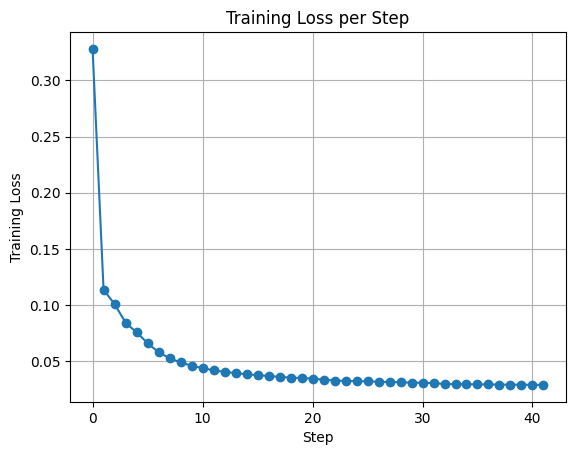

In [5]:
import matplotlib.pyplot as plt 

plt.figure()
plt.plot(df['Training Loss'], marker='o')
plt.title('Training Loss per Step')
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

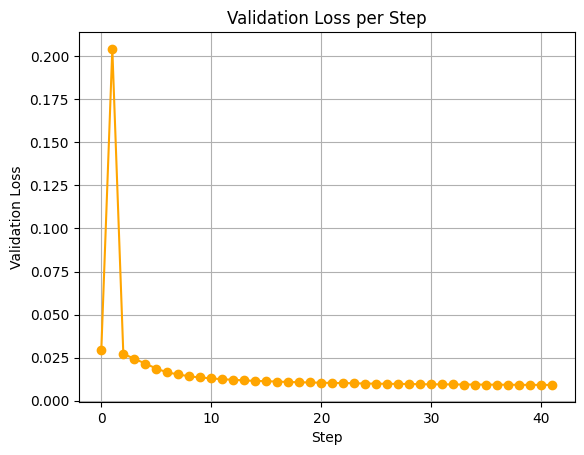

In [6]:
import matplotlib.pyplot as plt 

plt.figure()
plt.plot(df['Validation Loss'], marker='o', color='orange')
plt.title('Validation Loss per Step')
plt.xlabel('Step')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.show()